# **Model Training and Tuning**

In this notebook, we will train a Random Forest (RF) model on the Higgs boson dataset we have preprocessed in the previous notebook `01_data_exploration`. We will perform the model training and tuning process to obtain the best model with the highest accuracy possible.

## **Importing Libraries**

In this section, we will import the necessary libraries and packages that will be used throughout the notebook.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

## **Loading Data**

This code cell loads the training, validation, and test datasets that were saved in pkl format to the local directory.

In [ ]:
# Mount Google Drive in Colab
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load data from Google Drive
train_path = '/content/drive/MyDrive/Higgs_dataset/processed/training_data.pkl'
val_path   = '/content/drive/MyDrive/Higgs_dataset/processed/validation_data.pkl'
test_path  = '/content/drive/MyDrive/Higgs_dataset/processed/testing_data.pkl'

train_data = pd.read_pickle(train_path)
val_data = pd.read_pickle(val_path)
test_data = pd.read_pickle(test_path)

Mounted at /content/drive


## **Prepare the data for training**
This code separates the features and class labels from the train, validation, and test datasets.

In [ ]:
# Separate features and labels
y_train = train_data['class_label']
X_train = train_data.drop('class_label', axis=1)
y_val = val_data['class_label']
X_val = val_data.drop('class_label', axis=1)
y_test = test_data['class_label']
X_test = test_data.drop('class_label', axis=1)


## **Train the RF model**
This code sets the hyperparameters for an RF model, including the required number of trees in the Random Forest and the function to measure the quality of a split and the maximum depth of RF.

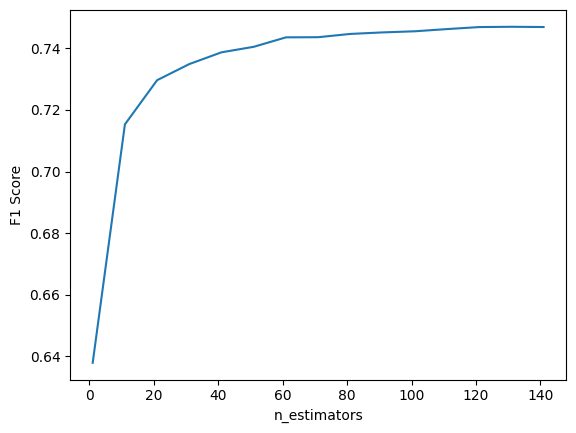

In [ ]:
#Fitting Random Forest classifier to the training set  


# number of trees to be used or estimators
estimators = list(range(1, 150, 10))
# Loop through the estimators
scores = []
for num_est in estimators:
    rf = RandomForestClassifier(n_estimators = num_est)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = f1_score(y_val, y_pred) #f1 score as metrics
    scores.append(score)

# Plot of scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.show()


**Observation:**

We can see from the graph that if we increase the number of  (trees in the forest), we get a higher F1 score, and after n_estimators = 100 the F1 score nearly plateaus.

Hence we choose 100 as the number of trees for the model.

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=100)  
RFclassifier.fit(X_train, y_train)  

# Calculate the accuracy on the training set
y_train_pred = RFclassifier.predict(X_train.values)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Training Accuracy: 100.00%


**Observation:**

The model seems overfitting, so we need to change hyperparameters other than the n_estimators. 

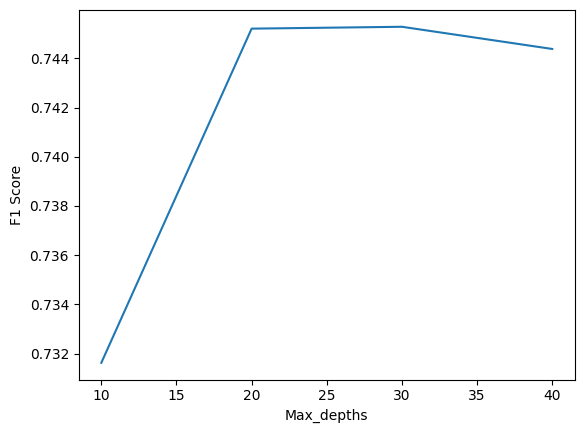

In [ ]:
#Fitting Random Forest classifier to the training set  


max_depths = list(range(10, 50, 10))

scores = []
for m in max_depths:
    rf = RandomForestClassifier(n_estimators = 100, max_depth = m)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = f1_score(y_val, y_pred) #f1 score as metrics
    scores.append(score)

# Plot of scores corrosponding to max_depths to find the best possible max_depth
plt.plot(max_depths, scores)
plt.xlabel('Max_depths')
plt.ylabel('F1 Score')
plt.show()

**Observation:**

We can see from the graph that if we increase the max_depth we get a higher F1 score, and between max_depth = 20 and max_depth = 30, the F1 score nearly plateaus.

Hence we choose 25 as max_depth.

In [ ]:
#Fitting Random Forest Classifier model with n_estimators=100, max_depth=25  
RFclassifier = RandomForestClassifier(n_estimators=100, max_depth=25)  
RFclassifier.fit(X_train, y_train)  

# Calculate the accuracy on the training set
y_train_pred = RFclassifier.predict(X_train.values)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Training Accuracy: 99.37%


**Observation:**

The model seems overfitting, so we will try to adjust other parameters

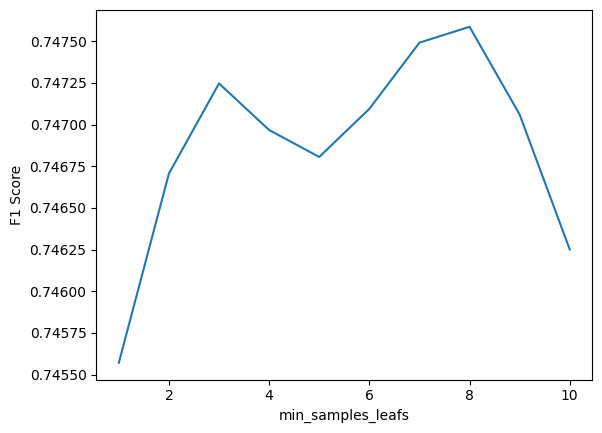

In [20]:
#Fitting Random Forest classifier to the training set  
min_samples_leafs = list(range(1, 11, 1))

scores = []
for m in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = m)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = f1_score(y_val, y_pred) #f1 score as metrics
    scores.append(score)
# Plot of scores corrosponding to random_states to find the best possible random_state
plt.plot(min_samples_leafs, scores)
plt.xlabel('min_samples_leafs')
plt.ylabel('F1 Score')
plt.show()

**Observation:**
8 seems as a good value for min_samples_leaf

In [22]:
RFclassifier = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_leaf = 8,random_state = 42)
RFclassifier.fit(X_train, y_train)  

RandomForestClassifier(max_depth=25, min_samples_leaf=8, random_state=42)

In [23]:
# calculate the accuracy and F1 score
y_train_pred = RFclassifier.predict(X_train.values)
accuracy = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("F1 Score: {:.2f}%".format(f1*100))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 90.76%
F1 Score: 91.38%


## **Model Evaluation**
## Make predictions on the test data and evaluate the model performance
This code uses the RF model that was previously trained to make predictions on the test data.

In [25]:
# Make predictions on the test data
y_test_pred = RFclassifier.predict(X_test.values)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
score = f1_score(y_test, y_test_pred)#f1 score as metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("F1 Score: {:.2f}%".format(score*100))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 72.94%
F1 Score: 74.75%


## **Model Tuning**

Hyperparameter tuning for RF Classifier Using RadomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

# create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)


# define the hyperparameters distribution to sample from
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': randint(50, 500),
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}


# create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=50, random_state=42)

# fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# print the best hyperparameters
print(random_search.best_params_)

# make predictions on the testing data using the best model
y_pred = random_search.predict(X_test)

# calculate the ROC AUC score of the best model
roc_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC score:', roc_auc)